# <span style="color:#2595bc"><i>K</i>-Armed Bandit Problem</span>
## <span style="color:#2595bc"> Basics and Definitions </span>

Imagine you have a slot machine with $K$-arms or levers. Whenever you pull down one lever, you are given a reward based upon which lever you pulled. Each lever arm has a reward associated with it. When the probabilistic distribution of rewards associated with a lever do not change with time, ie they are fixed, it's <span style="color:#f31818"><i>stationary problem</i></span>. When the rewards change with use of levers, it's a <span style="color:#f31818"><i>non-stationary</i></span> one. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or <i>time steps</i>

Each of the $k$ actions have an expected or mean reward that we expect to get when we select that action. We denote the action selected on time step $t$ as $A_{t}$ and the corresponding reward as $R_{t}$. The <b><span style="color:#f31818">action value</span></b> then of an arbitrary action $a$, denoted $q_{*} (a)$, is the expected reward given that a is selected:<br>
    $$q_{*} (a) = \mathbb{E}[R_{t}|A_{t}=a]$$
 
Simply put, we <b>estimate</b> how much reward we ought to get when we choose action $a$ based on our previous experiences when we chose the same action.If you knew the value of each action, then it would be trivial to solve the k-armed bandit problem: you would always select the action with highest value in order to maximize the objective. We assume that you do not know the action values with certainty, although we may make estimates as we play the game. Based on our ever-evolving estimates we will choose our option that is most likely to give us the most reward.

## <span style="color:#2595bc"> Explorations VS Exploitation</span>

If you maintain estimates of the action values, then at any time step there is at
least one action whose estimated value is greatest. We call these the <b><i>greedy</i></b> actions.
When you select one of these actions, we say that you are <b><i><span style="color:#f31818">exploiting</span></i></b> your current
knowledge of the values of the actions. If instead you select one of the <b><i>nongreedy</i></b> actions, then we say you are <b><i><span style="color:#f31818">exploring</span></i></b>, because this enables you to improve your
estimate of the nongreedy action’s value. Exploitation is the right thing to do to
maximize the expected reward on the one step, but exploration may produce the
greater total reward in the long run.

Reward is lower in the short run, during exploration, but higher in the long run because after you have discovered the better actions, you can exploit them many times. Because it is not possible both to explore and to exploit with any single action selection, one often refers to the “conflict” between exploration and exploitation.

## <span style="color:#2595bc">Estimating Action Values</span>

The simplest and intuitive way of estimating Action Value at step $t$ for a particular action $a$ is to take the <i>mean</i> of the rewards we got in the past whenever we chose action $a$.<br>
$$Q_{t}(a) = \frac{\text{sum of rewards when 'a' taken prior to 't'}}{\text{number of times 'a' taken prior to 't'}} = \frac{\sum_{i=1}^{t-1}R_{i}\cdot \textbf{1}_{\text A_{i}=a}} {\sum_{i=1}^{t-1}\textbf{1}_{\text A_{i}=a}}$$

where $\textbf 1_{condition}$ denotes is 1 if $condition$ is true and 0 if it is not. Simply put, the above expression just estimates the average returns each time we chose action $a$ , prior to state $t$

If the denominator is zero, then we instead define $Q_{t}(a)$ as some default value,
such as $Q_{1}(a) = 0$

## <span style="color:#2595bc"> Which action to take( or which lever to pull )? </span>


The simplest action selection rule is to select the action (or one of the actions)
with <span style="color:#f31818">highest estimated action value</span>, that is, to select at step $t$ one of the greedy
actions, $ A_{t}^* $ , for which $Q_{t}(A_{t}^*) = max_{a} Q_{t}(a)$. 

All that the above equation says is that, at a given state $t$, the action $a$ will be our preferred choice i.e $a$ will be $A_{t}^*$ if the action value associated with $a$ , which is $Q_{t}(a)$ is the maximum among all action values for all possibilites of $a$.


The above <i><span style="color:#f31818">greedy action selection</span></i> method can be also be written mathematically as :- 
$$A_{t} = argmax_a Q_t(a)$$
where $argmax_a$ denotes the value of $a$ at which the expression that follows is maximized
(with ties broken arbitrarily)


## <span style="color:#2595bc">Okay. But what about exploration?</span>

Greedy action selection always exploits current knowledge to maximize immediate reward; it spends no time at all sampling apparently
inferior actions to see if they might really be better. A simple alternative is to
behave greedily most of the time, but every once in a while, say with small probability
$\varepsilon$, instead to select randomly from amongst all the actions with equal probability
independently of the action-value estimates.We call methods using this near-greedy
action selection rule <i><span style="color:#f31818">$\varepsilon-greedy$ methods</span></i>. 





In [1]:
#Import dependencies
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


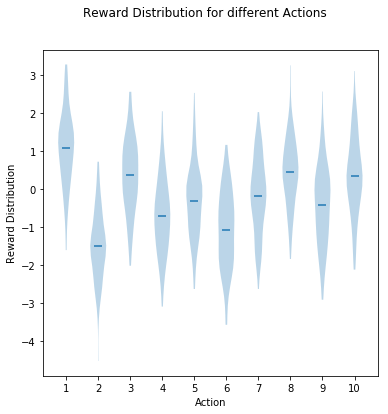

In [2]:
# An example bandit problem 

import random
import numpy as np
import matplotlib.pyplot as plt

def example_bandit_rewards_plot():
    # fake data
    fs = 10  # fontsize
    pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    data = [np.random.normal(0, std, size=100) for std in pos]

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    optimal_action_values = np.random.normal(0, 1, size=10)

    rewards = [np.random.normal(optimal_action_value,1,size=100) for optimal_action_value in optimal_action_values]

    axes.violinplot(rewards, pos, points=20, 
                          showmeans=True, showextrema=False, showmedians=False)
    #axes.set_title('Reward Distribution for different Actions', fontsize=fs)


    axes.set_xlabel("Action")
    axes.set_xticks(pos)
    axes.set_ylabel("Reward Distribution")
    fig.suptitle("Reward Distribution for different Actions")
    #fig.subplots_adjust(hspace=0.4)
    plt.show()

example_bandit_rewards_plot()


epsilon :  0.1 	 average reward value 2.1015084068749306
epsilon :  0 	 average reward value 1.0630794256482199


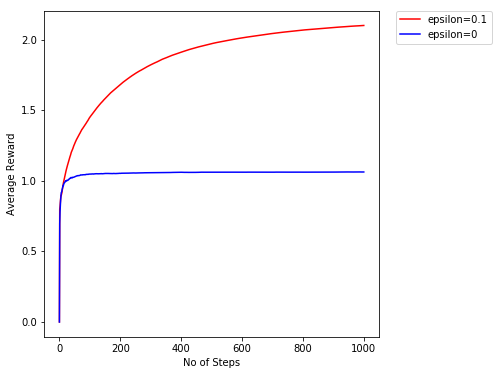

In [35]:
#Multi Armed bandit 
list_optimal = [0.5,0.7,0.9,1.1,2.4,0.1,0.9,0.1,0.3,0.7]

def greedy_bandit(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1):
    no_of_actions = arms
    #optimal_action_values = np.random.normal(mean_optimal, std_dev_optimal, size=no_of_actions)
    optimal_action_values = list_optimal
    expect = [init_expectation]*no_of_actions
    act_occur = [0]*no_of_actions

    def get_maxvalue_index(list_):
        #Get list of indexes which contain maximum value in a list
        indexes_of_max_values = np.argwhere(list_ == np.amax(list_)).flatten().tolist()
        #return an index randomly
        return random.choice(indexes_of_max_values)

    avg_rward_list = [0]
    avg_rward_value = 0


    counter = 0
    #print (optimal_action_values)
   
    for t in range(iterations):

        counter += 1
       
        if random.random()<epsilon:
            act_index = random.randint(0,no_of_actions-1)
            #print ("*")
        else:
            act_index = (get_maxvalue_index(expect))
        act_occur[act_index]+=1
        rward_t = np.random.normal(optimal_action_values[act_index],std_dev_reward)

        expect[act_index] = (((expect[act_index]*(act_occur[act_index]-1))+rward_t)/(act_occur[act_index]))

        avg_rward_value = ((avg_rward_value*(counter-1))+rward_t)/(counter)
        avg_rward_list.append(avg_rward_value)
        #print  (act_index)
    #plt.plot(avg_rward_list,color=colr)
    #print ("Average Reward : Greedy : \t",avg_rward_value)
    return avg_rward_list,avg_rward_value


def greedy_experiment(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1,no_of_exp = 500):
    rward_list = [0]
    rward_value = 0
    for x in range(no_of_exp):
        avg_lists, avg_values = greedy_bandit(arms,mean_optimal,std_dev_optimal,std_dev_reward,init_expectation,iterations,epsilon)
        if x == 0:
            rward_list = avg_lists
            rward_value = avg_values
        else:
            rward_list = np.add(np.dot(x,rward_list),avg_lists)/(x+1)
            rward_value = ((x*rward_value)+avg_values)/(x+1)
  
    print ("epsilon : ","\t average reward value",rward_value)
    return (rward_list)
#a = plot_greedy(epsilon=0.1)
#b = plot_greedy(epsilon=0.5)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axes.plot(greedy_experiment(epsilon=0.1),color='r', label="epsilon=0.1")
axes.plot(greedy_experiment(epsilon=0),color='b',label="epsilon=0")
axes.set_xlabel("No of Steps")

axes.set_ylabel("Average Reward")
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## <span style="color:#2595bc">Optimistic Initial Values</span>

Initial action values can also be used as a simple way of encouraging exploration. The initial action-values $Q_1(a)$ acts as "bias" to our expectations. For eg, if we set the initial action-values to a high number, then when the real reward will be less than our expectation, our agent will be disappointed, the expectation from that action will decrease and our agent and will move on to explore other actions. Thus <i><span style="color:#f31818">exploration is "induced" initially</span></i> by setting a high initial action-value.

Conversely setting a low initial expectation will lead to more exploitation that exploration as our agent would be quite delighted initially because the results would be higher than our initial estimates

epsilon :  0 	 average reward value 2.2937775242781275
epsilon :  0 	 average reward value 1.0149124213652514
epsilon :  0 	 average reward value 0.7845648440636815


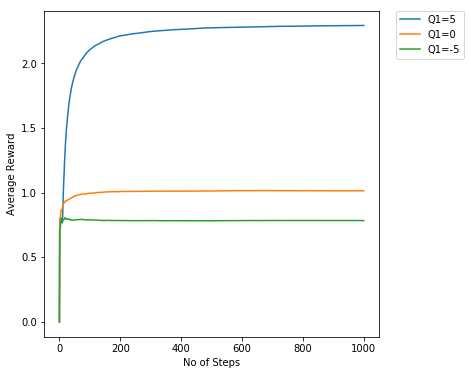

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axes.plot(greedy_experiment(init_expectation=5,epsilon=0), label="Q1=5")
axes.plot(greedy_experiment(init_expectation=0,epsilon=0),label="Q1=0")
axes.plot(greedy_experiment(init_expectation=-5,epsilon=0),label="Q1=-5")
axes.set_xlabel("No of Steps")

axes.set_ylabel("Average Reward")
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It is necessary to note however that setting optimistic initial values is <span style="color:#f31818">not well suited to nonstationary problems</span> because its drive for exploration is inherently <span style="color:#f31818"><b>temporary</b></span>. If the task changes, creating a renewed need for
exploration, this method cannot help. Indeed, any method that focuses on the initial
state in any special way is unlikely to help with the general nonstationary case

## <span style="color:#2595bc">Upper-Confidence-Bound Action Selection</span>

Exploration is needed because the estimates of the action values are uncertain. The
greedy actions are those that look best at present, but some of the other actions
may actually be better. ε-greedy action selection forces the non-greedy actions to
be tried, but indiscriminately, with no preference for those that are nearly greedy or
particularly uncertain. It would be better to select among the non-greedy actions
according to their potential for actually being optimal, taking into account both how
close their estimates are to being maximal and the uncertainties in those estimates.
One effective way of doing this is to select actions as -


$$\begin{equation*}
A_t = argmax_{a}\Bigl[Q_t(a) + c\sqrt{\frac{\log t}{N_t(a)}}\Bigr]
\end{equation*}
$$

where $\log t$ denotes the natural logarithm of $t$ (the number that e ≈ 2.71828 would
have to be raised to in order to equal $t$), $N_t(a)$ denotes the number of times that
action $a$ has been selected prior to time t (the denominator in (2.1)), and the number
c > 0 controls the degree of exploration. If Nt(a) = 0, then a is considered to be a
maximizing action.

The idea of this <span style="color:#f31818"><i>upper confidence bound</i> (UCB)</span> action selection is that the squareroot
term is a <b>measure of the uncertainty or variance</b> in the estimate of $a$’s value.
The quantity being max’ed over is thus a sort of upper bound on the possible true
value of action $a$, with the $c$ parameter determining the confidence level. 

Each time
$a$ is selected the uncertainty is reduced; $N_t(a)$ is incremented and, as
it appears in the denominator of the uncertainty term, the term is decreased. On
the other hand, each time an action other than a is selected $t$ is increased but Nt(a)
is not; as $t$ appears in the numerator the uncertainty estimate is increased. The
use of the natural logarithm means that the increase gets smaller over time, but is
unbounded; <span style="color:#f31818">all actions will eventually be selected, but as time goes by it will be
a longer wait</span>, and thus a lower selection frequency, for actions with a lower value
estimate or that have already been selected more times


epsilon :  0.1 	 average reward value 2.1025605816812427
epsilon :  	 average reward value 2.2685104948236674


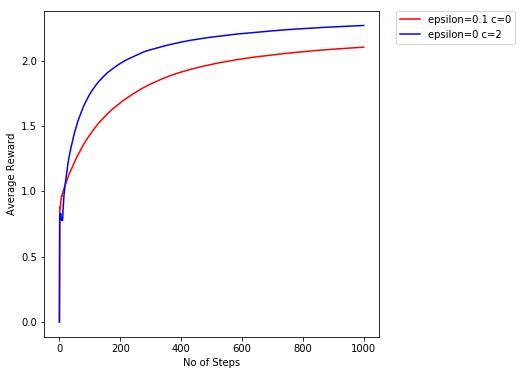

In [54]:

def UCB_bandit(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1,c=2):
    no_of_actions = arms
    #optimal_action_values = np.random.normal(mean_optimal, std_dev_optimal, size=no_of_actions)
    optimal_action_values = list_optimal
    expect = [init_expectation]*no_of_actions
    act_occur = [0]*no_of_actions

    def get_maxvalue_index(list_):
        #Get list of indexes which contain maximum value in a list
        indexes_of_max_values = np.argwhere(list_ == np.amax(list_)).flatten().tolist()
        #return an index randomly
        return random.choice(indexes_of_max_values)

    avg_rward_list = [0]
    avg_rward_value = 0


    counter = 0
    #print (optimal_action_values)
   
    for t in range(iterations):

        if t==0:
            act_index = get_maxvalue_index(expect)
        else:
            sqrt_term = c*(np.sqrt(np.log(t)/np.add(act_occur,1e-4)))
            decision_list = expect + sqrt_term
            act_index = get_maxvalue_index(decision_list)
        
        counter += 1
        
        
        act_occur[act_index]+=1
        rward_t = np.random.normal(optimal_action_values[act_index],std_dev_reward)

        expect[act_index] = (((expect[act_index]*(act_occur[act_index]-1))+rward_t)/(act_occur[act_index]))

        avg_rward_value = ((avg_rward_value*(counter-1))+rward_t)/(counter)
        avg_rward_list.append(avg_rward_value)
        #print  (act_index)
    #plt.plot(avg_rward_list,color=colr)
    #print ("Average Reward : Greedy : \t",avg_rward_value)
    return avg_rward_list,avg_rward_value


def UCB_experiment(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1,c=2,no_of_exp = 500):
    rward_list = [0]
    rward_value = 0
    for x in range(no_of_exp):
        avg_lists, avg_values = UCB_bandit(arms,mean_optimal,std_dev_optimal,std_dev_reward,init_expectation,iterations,epsilon,c)
        if x == 0:
            rward_list = avg_lists
            rward_value = avg_values
        else:
            rward_list = np.add(np.dot(x,rward_list),avg_lists)/(x+1)
            rward_value = ((x*rward_value)+avg_values)/(x+1)
  
    print ("epsilon : ","\t average reward value",rward_value)
    return (rward_list)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axes.plot(greedy_experiment(epsilon=0.1),color='r', label="epsilon=0.1 c=0")
axes.plot(UCB_experiment(epsilon=0,c=2),color='b',label="epsilon=0 c=2")
axes.set_xlabel("No of Steps")

axes.set_ylabel("Average Reward")
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## <span style="color:#2595bc">Incremental Implementation</span>
Let $R_i$ denote the reward after $i$th selection of a specific action $a$. Let $Q_n$ denote the estimate of it's action value after $a$ has been selected $n-1$ times, then we know that
$Q_n = \frac{ R_1+R_2+.+.+R_{n-1}}{n-1}$

There is some math involved in the subsequent step. If you are not able to get it, fret not. Jump down the equations where I have explained the result.
So, the expression for $Q_n$ can be further simplified in a way that we don't need to store all the $R_{i}$'s to compute the sum. Given $Q_n$  and the $n$th reward, $R_n$, the new average of all $n$ rewards can be computed by - 

$ Q_{n+1} = \frac{1}{n}\sum\limits_{i=1}^n R_i $

$ =\frac{1}{n}\left( R_n + \sum\limits_{i=1}^{n-1} R_i\right) $

$ =\frac{1}{n}\Biggl( R_n + (n-1)\dfrac{1}{n-1}\sum\limits_{i=1}^{n-1}R_i\Biggr) $

$=\frac{1}{n}\Biggl( R_n + (n-1) Q_{n}\Biggr)$

$=\frac{1}{n}\Biggl( R_n + nQ_{n} - Q_n\Biggr)$

$=Q_n + \frac{1}{n}\Biggl[R_n - Q_n\Biggr]$

This can be further written as 

$Q_{n+1} = Q_{n} + \alpha\Biggl[R_n - Q_n\Biggr]$

The <span style="color:#f31818"><i>$\alpha$</i></span> here is known as <span style="color:#f31818"><i>step size</i></span>. Note that as far we have studies, $\alpha$ changes with time and is not constant. The equation can also be expressed as - 

$$
NewEstimate = OldEstimate + StepSize \Biggl[Target - OldEstimate\Biggr]
$$

The expression $[Target - OldEstimate]$ is an <span style="color:#f31818"><i>error</i></span> in the estimate. At each step we try to predict the $Action Values$ accurately so that we can make a proper decision. But the <i>error</i> reflects how much our prediction$(Q_n)$ differs from the actual rewards we obtain. We need to reduce this error. It is by modifying our prediction by taking a step toward the “Target.” The target is presumed to indicate a desirable direction in which to move. The actual reward $R$ is our desired output as our prediction ideally should give this output. Therefore we change our $OldEstimate$ by a value $[Target - OldEstimate]$ which is nothing but the error.

## <span style="color:#2595bc">Non-Stationary Problem</span>

The averaging methods discussed so far are appropriate in a stationary environment,
but not if the bandit is changing over time. In such cases
it makes sense to weight recent rewards more heavily than long-past ones. One of
the most popular ways of doing this is to use <b>constant step-size</b>.

So, we can take a constant $\alpha$ and modify our update rule as 
$$Q_{n+1} = Q_{n} + \alpha\Biggl[R_n - Q_n\Biggr]$$

where the step-size $\alpha \in (0,1]$ i.e $\alpha$ can vary from 0 to 1(excluding 0 and including 1)

This results in $Q_{n+1}$ taking a very interesting form. $Q_{n+1}$ becomes a <b><i>weighted average</i></b> of past rewards and the initial estimate $Q_1$

$$Q_{n+1} = Q_n + \alpha[R_n - Q_n]$$

<span style="color:#f31818"> $$= \alpha R_n + (1-\alpha)Q_n$$ </span>

This intermediate step gives very vital insight to what we are doing. Initially when we were simply taking the average of all the rewards we got, we gave <b>equal weightage</b> to each reward we got for computing the expectation/prediction, disregarding at which time step we got the reward. However here, we assign a weight of $\alpha$ to the latest reward we get, which is $R_n$ and a weight of $1-\alpha$ to the previous estimate $Q_n$ Now we will explore what weights we give to the returns we get at an arbitrary time step $R_t$ under this method

$\alpha R_n + (1-\alpha)Q_n$

$= \alpha R_n + (1-\alpha)[\alpha R_{n-1} + (1-\alpha)Q_{n-1}]$

$= \alpha R_n + (1-\alpha)\alpha R_{n-1} + (1-\alpha)^2Q_{n-1}$

$= \alpha R_n + (1-\alpha)\alpha R_{n-1} + (1-\alpha)^2\alpha R_{n-2} + \\ . . .(1-\alpha)^{n-1}\alpha R_1 + (1-\alpha)^n Q_1$

$= (1-\alpha)^n Q_1 +\sum\limits_{i=1}^n\alpha(1-\alpha)^{n-i}R_i$

So when $\alpha$ is fixed, note that the weight, $\alpha(1 -\alpha)^{n-i}$
, given
to the reward $R_i$ depends on how many rewards ago, $n - i$, it was observed. The
quantity $1-\alpha$ is less than 1, and thus the weight given to $R_i$ decreases as the number
of intervening rewards increases. In fact, the weight decays exponentially according
to the exponent on 1 - $\alpha$. (If 1 - $\alpha$ = 0, then all the weight goes on the very last
reward, $R_n$, because of the convention that $0^0 = 1$.) Accordingly, this is sometimes
called an exponential, recency-weighted average.


We call this a <span style="color:#f31818">weighted average</span> because the sum of the weights is $(1-\alpha)^n + \sum\limits_{i=1}^{n} \alpha(1-\alpha)^{n-i} = 1$  ( Check yourself )



alpha :  0.2 	 epsilon :  0.0 	 average reward value 2.205451441897103
alpha :  0.2 	 epsilon :  0.1 	 average reward value 2.4961119304366735
alpha :  0.0 	 epsilon :  0.1 	 average reward value 0.665103442884939
alpha :  0.0 	 epsilon :  0.0 	 average reward value 0.6670150493998444


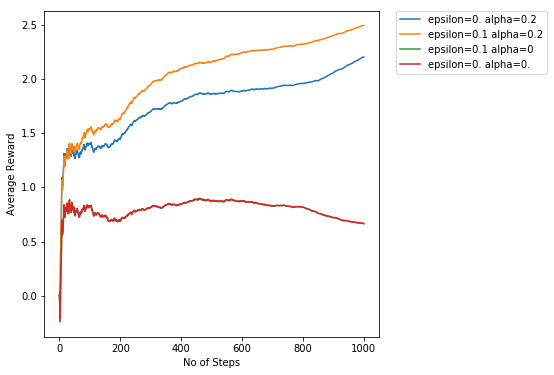

In [37]:
def weighted_non_stationary(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1, alpha=0.5):
    no_of_actions = arms
    #optimal_action_values = np.random.normal(mean_optimal, std_dev_optimal, size=no_of_actions)
    optimal_action_values = list_optimal
    expect = [init_expectation]*no_of_actions
    act_occur = [0]*no_of_actions

    def get_maxvalue_index(list_):
        #Get list of indexes which contain maximum value in a list
        indexes_of_max_values = np.argwhere(list_ == np.amax(list_)).flatten().tolist()
        #return an index randomly
        return random.choice(indexes_of_max_values)

    avg_rward_list = [0]
    avg_rward_value = 0


    counter = 0
    #print (optimal_action_values)
   
    for t in range(iterations):

        counter += 1
        if counter%200==0:
            np.random.seed(counter)
            changes = np.random.normal(mean_optimal,std_dev_optimal,no_of_actions)
            optimal_action_values = np.add(optimal_action_values,changes)
        
       
        if random.random()<epsilon:
            act_index = random.randint(0,no_of_actions-1)
            #print ("*")
        else:
            act_index = (get_maxvalue_index(expect))
        act_occur[act_index]+=1
        rward_t = np.random.normal(optimal_action_values[act_index],std_dev_reward)

        expect[act_index] = ((rward_t*alpha) + ((1-alpha)*(expect[act_index])))
        avg_rward_value = ((avg_rward_value*(counter-1))+rward_t)/(counter)
        avg_rward_list.append(avg_rward_value)
        #print  (act_index)
    #plt.plot(avg_rward_list,color=colr)
    #print ("Average Reward : Greedy : \t",avg_rward_value)
    return avg_rward_list,avg_rward_value


def weighted_non_stationary_experiment(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1,alpha=0.5,no_of_exp = 500):
    rward_list = [0]
    rward_value = 0
    for x in range(no_of_exp):
        avg_lists, avg_values = weighted_non_stationary(arms,mean_optimal,std_dev_optimal,std_dev_reward,init_expectation,iterations,epsilon,alpha)
        if x == 0:
            rward_list = avg_lists
            rward_value = avg_values
        else:
            rward_list = np.add(np.dot(x,rward_list),avg_lists)/(x+1)
            rward_value = ((x*rward_value)+avg_values)/(x+1)
  
    print ("alpha : ",alpha, "\t epsilon : ",epsilon,"\t average reward value",rward_value)
    return (rward_list)
                                           
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axes.plot(weighted_non_stationary_experiment(epsilon=0.,alpha=0.2), label="epsilon=0. alpha=0.2")
axes.plot(weighted_non_stationary_experiment(epsilon=0.1,alpha=0.2), label="epsilon=0.1 alpha=0.2")
axes.plot(weighted_non_stationary_experiment(epsilon=0.1,alpha=0.), label="epsilon=0.1 alpha=0")
axes.plot(weighted_non_stationary_experiment(epsilon=0.,alpha=0.), label="epsilon=0. alpha=0.")
#axes.plot(greedy_experiment(epsilon=0),color='b',label="epsilon=0")
axes.set_xlabel("No of Steps")

axes.set_ylabel("Average Reward")
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## <span style="color:#2595bc">GRADIENT BANDIT ALGORITHMS</span>

Uptill now we have considered methods that estimate action values and
use those estimates to select actions. This is often a good approach, but it is not the
only one possible. In this section we consider learning a <span style="color:#f31818">numerical preference $H_t(a)$</span>
for each action a. The larger the preference, the more often that action is taken, but
the preference has no interpretation in terms of reward. Only the relative preference
of one action over another is important; if we add 1000 to all the preferences there is
no effect on the action probabilities,

Long story short, we associate some numerical probability of us taking an action. Based upon what reward we get for the action, we change the probability associated with that action. Unlike. previous algorithms, we do not compute action values rather <span style="color:#f31818">deal with direct probability of choosing a particular action.</span> 

The probability for a particular action are determined by the <i>numerical preference</i> $H_t(a)$ according to a soft-max
distribution (i.e., Gibbs or Boltzmann distribution) as follows:

$\begin{equation*}
Pr\Biggl\{ A_t = a \Biggl\} = \frac{e^{H_t(a)}}{\sum\limits_{b=1}^{b=k}e^{H_t(b)}} = \pi_t(a)
\end{equation*}$

$\pi_t(a)$refers to the probability of
taking action $a$ at time t. Initially all preferences are the same (e.g., $H_1(a)$ = 0, ∀$a$)
so that all actions have an equal probability of being selected.

How do we update the probabilities then ?

On each step, after selecting the action $A_t$ and receiving the reward
$R_t$ , the preferences are updated by:

$$\begin{equation*}
H_{t+1}{A_t} = H_t(A_t) + \alpha(R_t - \bar R_t)(1 - \pi_t(A_t)),\\  \qquad and \\
\ \ \ H_{t+1}{a} = H_t(a) - \alpha(R_t - \bar R_t)(\pi_t(A_t)) \qquad \qquad \forall a \neq A_t
\end{equation*}$$

where $\alpha$ > 0 is a step-size parameter, and $\bar R_t$
 is the average of all the rewards
up through and including time t,

### <span style="color:#2595bc">EXPLAINATION</span>

The $\bar R_t$ term  <span style="color:#f31818">serves
as a baseline</span> with which the reward is compared. If the reward is higher than the
baseline, then the probability of taking $A_t$
in the future is increased, and if the reward
is below baseline, then probability is decreased. The non-selected actions move in
the opposite direction.

(Look up the derivation on your own)

In [ ]:

def gradient_bandit(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_pref = 0,iterations=1000,epsilon=0.1,alpha=0.1):
    no_of_actions = arms
    #optimal_action_values = np.random.normal(mean_optimal, std_dev_optimal, size=no_of_actions)
    optimal_action_values = list_optimal
    num_preferences = [init_expectation]*no_of_actions
    act_occur = [0]*no_of_actions

    def get_maxvalue_index(list_):
        #Get list of indexes which contain maximum value in a list
        indexes_of_max_values = np.argwhere(list_ == np.amax(list_)).flatten().tolist()
        #return an index randomly
        return random.choice(indexes_of_max_values)

    avg_rward_list = [0]
    avg_rward_value = 0


    counter = 0
    
   
    for t in range(iterations):

        counter += 1
       
        if random.random()<epsilon:
            act_index = random.randint(0,no_of_actions-1)
            
        else:
            act_index = (get_maxvalue_index(expect))
        act_occur[act_index]+=1
        rward_t = np.random.normal(optimal_action_values[act_index],std_dev_reward)

        expect[act_index] = (((expect[act_index]*(act_occur[act_index]-1))+rward_t)/(act_occur[act_index]))

        avg_rward_value = ((avg_rward_value*(counter-1))+rward_t)/(counter)
        avg_rward_list.append(avg_rward_value)
        
    
    return avg_rward_list,avg_rward_value


def gradient_experiment(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_pref = 0,iterations=1000,epsilon=0.1,alpha=0.1,no_of_exp = 500):
    rward_list = [0]
    rward_value = 0
    for x in range(no_of_exp):
        avg_lists, avg_values = gradient_bandit(arms,mean_optimal,std_dev_optimal,std_dev_reward,init_pref,iterations,epsilon, alpha)
        if x == 0:
            rward_list = avg_lists
            rward_value = avg_values
        else:
            rward_list = np.add(np.dot(x,rward_list),avg_lists)/(x+1)
            rward_value = ((x*rward_value)+avg_values)/(x+1)
  
    print ("epsilon : ","\t average reward value",rward_value)
    return (rward_list)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axes.plot(greedy_experiment(epsilon=0.1),color='r', label="epsilon=0.1")
axes.plot(greedy_experiment(epsilon=0),color='b',label="epsilon=0")
axes.set_xlabel("No of Steps")

axes.set_ylabel("Average Reward")
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)